In [1]:
import tensorflow
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [2]:
names = ['kolade','Damola','mummy kay']

In [3]:
kol_train = []
kol_test = []
dam_test = []
dam_train = []
mum_test = []
mum_train = []

In [4]:
test_dir = r'C:\Users\user\Desktop\experiment\Test'
train_dir = r'C:\Users\user\Desktop\experiment\Train'

In [5]:
#Train_set
os.chdir(train_dir+'\Kolade')
kol_train.extend(os.listdir())

os.chdir(train_dir+'\Damola')
dam_train.extend(os.listdir())

os.chdir(train_dir+'\Mummy Kay')
mum_train.extend(os.listdir())

In [6]:
os.chdir(test_dir+'\Kolade')
kol_test.extend(os.listdir())

os.chdir(test_dir+'\Damola')
dam_test.extend(os.listdir())

os.chdir(test_dir+'\Mummy Kay')
mum_test.extend(os.listdir())

In [7]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]

In [8]:
for i in kol_train:
    directory = train_dir + '/Kolade/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_train.append(img)
    y_train.append(0)
    
for i in dam_train:
    directory = train_dir + '/Damola/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_train.append(img)
    y_train.append(1)
    
for i in mum_train:
    directory = train_dir + '/Mummy Kay/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_train.append(img)
    y_train.append(2)

In [9]:
for i in kol_test:
    directory = test_dir + '/Kolade/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_test.append(img)
    y_test.append(0)
    
for i in dam_test:
    directory = test_dir + '/Damola/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_test.append(img)
    y_test.append(1)
    
for i in mum_test:
    directory = test_dir + '/Mummy Kay/' + i
    img = image.load_img(directory,target_size=(224,224),grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    X_test.append(img)
    y_test.append(2)

In [10]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [11]:
X_train.shape,X_test.shape

((305, 224, 224, 3), (73, 224, 224, 3))

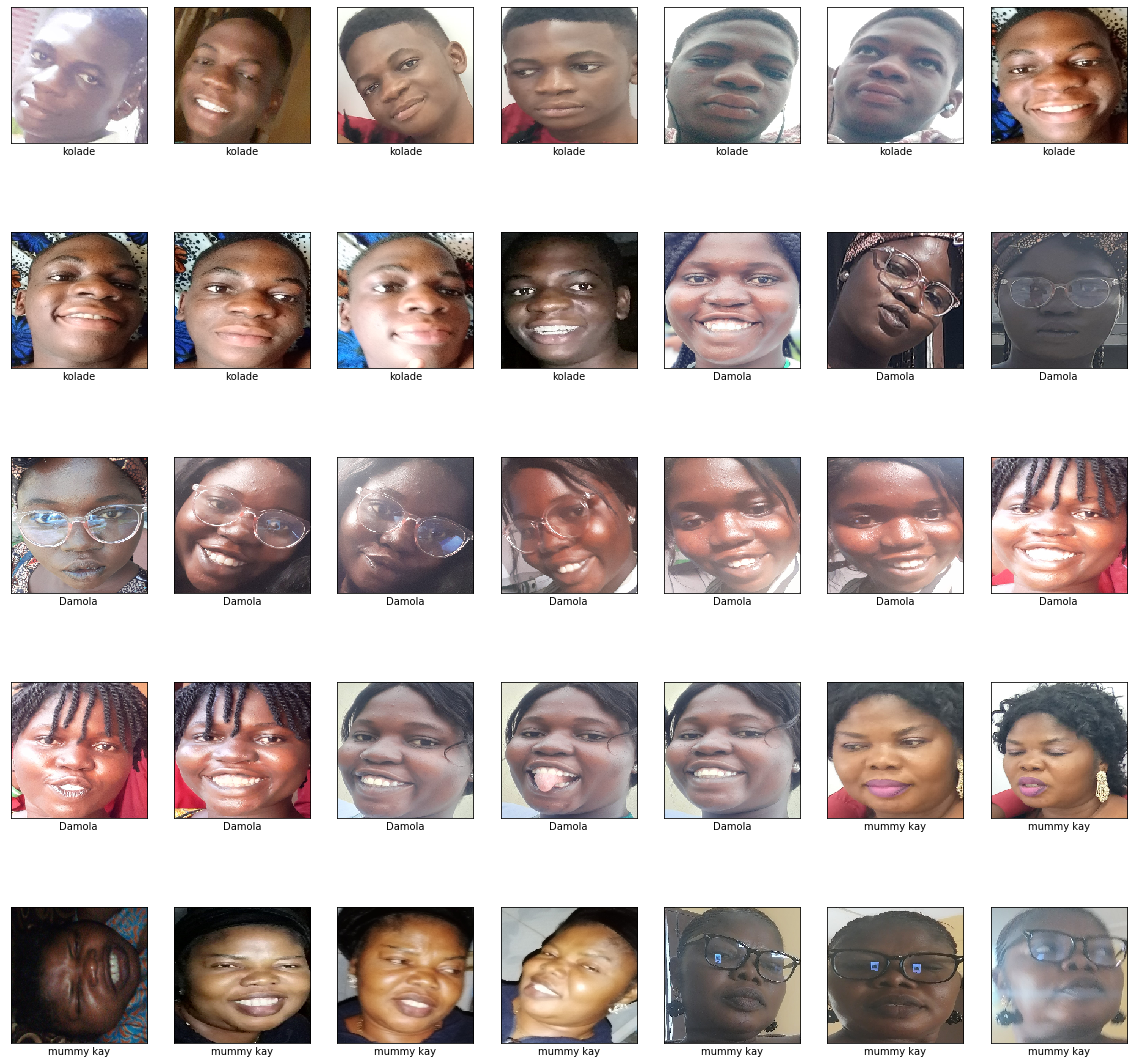

In [17]:
plt.figure(figsize = (20,20))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i*2],cmap=plt.cm.binary)
    plt.xlabel(names[y_test[i*2]])

In [11]:
from tensorflow.keras import models, layers

In [12]:
from tensorflow.keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [13]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(500,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(300,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(150,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(100,activation='relu',bias_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.25))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3,activation='softmax'))

In [14]:
print(f'Number of weights before freezing the conv base {len(model.trainable_weights)}')
conv_base.trainable = False
print(f'Number of weights after freezing the conv base {len(model.trainable_weights)}')

Number of weights before freezing the conv base 508
Number of weights after freezing the conv base 20


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
datagen = ImageDataGenerator(horizontal_flip=True,zoom_range=0.2,rotation_range=25)

In [18]:
it_train= datagen.flow(X_train,y_train,batch_size=5)

In [19]:
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [20]:
history = model.fit(it_train,validation_data=(X_test,y_test),steps_per_epoch=61,epochs=100,callbacks=[es,mc])

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.4307 - accuracy: 0.3783
Epoch 00001: val_accuracy improved from -inf to 0.35135, saving model to best_model3.h5
61/61 [==============================] - 98s 2s/step - loss: 1.4307 - accuracy: 0.3783 - val_loss: 1.7037 - val_accuracy: 0.3514
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 1.1194 - accuracy: 0.5197
Epoch 00002: val_accuracy improved from 0.35135 to 0.44595, saving model to best_model3.h5
61/61 [==============================] - 95s 2s/step - loss: 1.1194 - accuracy: 0.5197 - val_loss: 1.4232 - val_accuracy: 0.4459
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 1.1808 - accuracy: 0.4868
Epoch 00003: val_accuracy improved from 0.44595 to 0.52703, saving model to best_model3.h5
61/61 [==============================] - 97s 2s/step - loss: 1.1808 - accuracy: 0.4868 - val_loss: 1.1903 - val_accuracy: 0.5270
Epoch 4/100
61/61 [==============================] - ETA: 

Epoch 30/100
61/61 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.7204
Epoch 00030: val_accuracy did not improve from 0.63514
61/61 [==============================] - 87s 1s/step - loss: 0.6938 - accuracy: 0.7204 - val_loss: 1.1278 - val_accuracy: 0.5676
Epoch 31/100
61/61 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.7270
Epoch 00031: val_accuracy did not improve from 0.63514
61/61 [==============================] - 87s 1s/step - loss: 0.6933 - accuracy: 0.7270 - val_loss: 1.1584 - val_accuracy: 0.5405
Epoch 32/100
61/61 [==============================] - ETA: 0s - loss: 0.6468 - accuracy: 0.7467
Epoch 00032: val_accuracy did not improve from 0.63514
61/61 [==============================] - 87s 1s/step - loss: 0.6468 - accuracy: 0.7467 - val_loss: 1.2143 - val_accuracy: 0.5405
Epoch 33/100
61/61 [==============================] - ETA: 0s - loss: 0.7253 - accuracy: 0.6941
Epoch 00033: val_accuracy did not improve from 0.63514
61/61 [==